# Retail Data Cleaning and Exploration

## 1. Load the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('OnlineRetail.csv', encoding='latin1')

## 2. Initial Data Exploration

In [3]:
# 1. Display the first 5 rows
print("First 5 rows:")
print(df.head())

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [28]:
# 2. Display the last 5 rows
print("Last 5 rows:")
print(df.tail())

Last 5 rows:
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID Country  TotalPrice  Year  \
541904 2011-12-09 12:50:00       0.85    12680.0  France       10.20  2011   
541905 2011-12-09 12:50:00       2.10    12680.0  France       12.60  2011   
541906 2011-12-09 12:50:00       4.15    12680.0  France       16.60  2011   
541907 2011-12-09 12:50:00       4.15    12680.0  France       16.60  2011   
541908 2011-12-09 12:50:00       4.95    12680.0  France       14.85  2011   

        Month  Day  Hour MonthName DayOfWeek  TimeOfDay  
541904     12    9   

In [ ]:
# 3. Get a summary of the dataframe
print("Dataframe Info:")
print(df.info())

In [ ]:
# 4. Get descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

In [ ]:
# 5. Check the dimensions of the dataframe
print("Dataframe Shape:")
print(df.shape)

## 3. Handling Missing Data

In [ ]:
# 6. Check for missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())

In [ ]:
# 7. Calculate the percentage of missing values
print("Percentage of Missing Values:")
print(df.isnull().sum() / len(df) * 100)

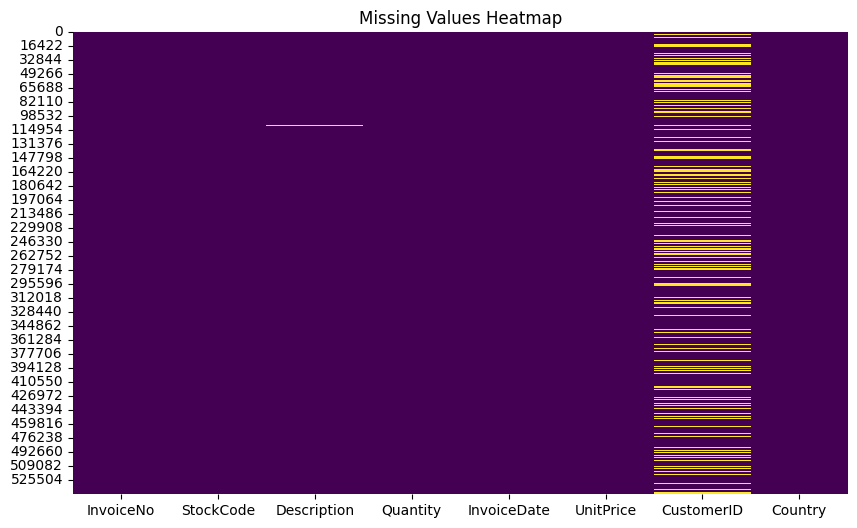

In [5]:
# 8. Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# 9. Handle missing Description
df['Description'].fillna('No description', inplace=True)

/var/folders/r_/20_6sxq14jg1m08plp8zgwpm0000gn/T/ipykernel_69625/3792026588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('No description', inplace=True)


In [7]:
# 10. Remove rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

## 4. Data Type Conversion

In [8]:
# 11. Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
# 12. Convert CustomerID to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [10]:
# 13. Convert StockCode to string
df['StockCode'] = df['StockCode'].astype(str)

## 5. Handling Duplicates

In [11]:
# 14. Check for duplicate rows
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 5225


In [12]:
# 15. Remove duplicate rows
df.drop_duplicates(inplace=True)

## 6. Handling Outliers and Invalid Data

In [13]:
# 16. Remove rows with negative Quantity
df = df[df['Quantity'] > 0]

In [14]:
# 17. Remove rows with zero or negative UnitPrice
df = df[df['UnitPrice'] > 0]

In [15]:
# 18. Remove non-product stock codes
df = df[~df['StockCode'].isin(['POST', 'D', 'M', 'C2', 'BANK CHARGES', 'PADS', 'DOT'])]

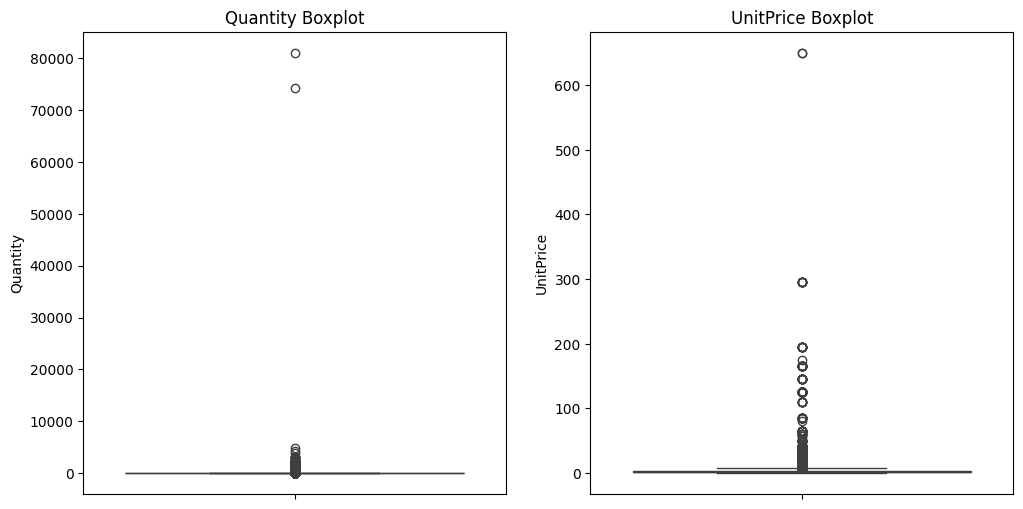

In [16]:
# 19. Visualize Quantity and UnitPrice distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Quantity Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'])
plt.title('UnitPrice Boxplot')
plt.show()

In [17]:
# 20. Remove outliers using the IQR method
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR)))]

Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['UnitPrice'] < (Q1 - 1.5 * IQR)) | (df['UnitPrice'] > (Q3 + 1.5 * IQR)))]

## 7. Feature Engineering

In [18]:
# 21. Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
# 22. Extract date components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [20]:
# 23. Create MonthName column
df['MonthName'] = df['InvoiceDate'].dt.month_name()

In [21]:
# 24. Create DayOfWeek column
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

In [22]:
# 25. Create TimeOfDay feature
df['TimeOfDay'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

## 8. Final Exploration

In [23]:
# 26. Show the cleaned data's first 5 rows
print("Cleaned Data Head:")
print(df.head())

Cleaned Data Head:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  Year  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom       15.30  2010   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  2010   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom       22.00  2010   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  2010   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom       20.34  2010   

   Month  Day  Hour MonthName  DayOfWeek TimeOfDay  
0     12

In [24]:
# 27. Show the cleaned data's info
print("Cleaned Data Info:")
print(df.info())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 333045 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    333045 non-null  object        
 1   StockCode    333045 non-null  object        
 2   Description  333045 non-null  object        
 3   Quantity     333045 non-null  int64         
 4   InvoiceDate  333045 non-null  datetime64[ns]
 5   UnitPrice    333045 non-null  float64       
 6   CustomerID   333045 non-null  object        
 7   Country      333045 non-null  object        
 8   TotalPrice   333045 non-null  float64       
 9   Year         333045 non-null  int32         
 10  Month        333045 non-null  int32         
 11  Day          333045 non-null  int32         
 12  Hour         333045 non-null  int32         
 13  MonthName    333045 non-null  object        
 14  DayOfWeek    333045 non-null  object        
 15  TimeOfDay    333045 

In [25]:
# 28. Show the cleaned data's description
print("Cleaned Data Description:")
print(df.describe())

Cleaned Data Description:
            Quantity                    InvoiceDate      UnitPrice  \
count  333045.000000                         333045  333045.000000   
mean        7.552664  2011-07-12 13:55:28.422825472       2.194624   
min         1.000000            2010-12-01 08:26:00       0.060000   
25%         2.000000            2011-04-08 09:54:00       1.250000   
50%         6.000000            2011-08-03 12:06:00       1.650000   
75%        12.000000            2011-10-23 12:08:00       2.950000   
max        27.000000            2011-12-09 12:50:00       7.500000   
std         6.777560                            NaN       1.545976   

          TotalPrice           Year          Month            Day  \
count  333045.000000  333045.000000  333045.000000  333045.000000   
mean       12.907620    2010.934976       7.655779      15.051026   
min         0.060000    2010.000000       1.000000       1.000000   
25%         3.950000    2011.000000       5.000000       7.000000  

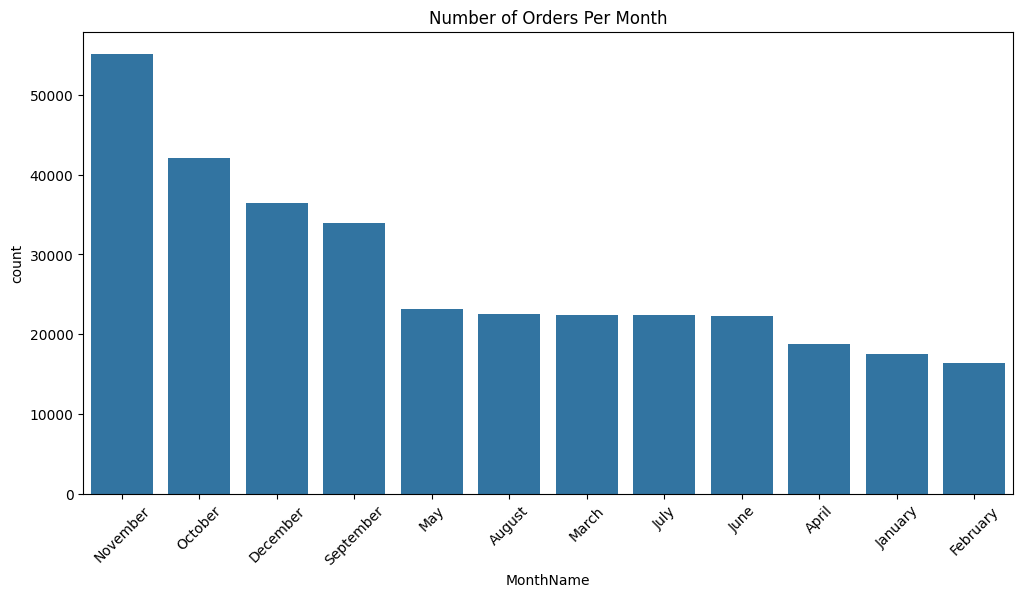

In [26]:
# 29. Plot number of orders per month
plt.figure(figsize=(12, 6))
sns.countplot(x='MonthName', data=df, order=df['MonthName'].value_counts().index)
plt.title('Number of Orders Per Month')
plt.xticks(rotation=45)
plt.show()

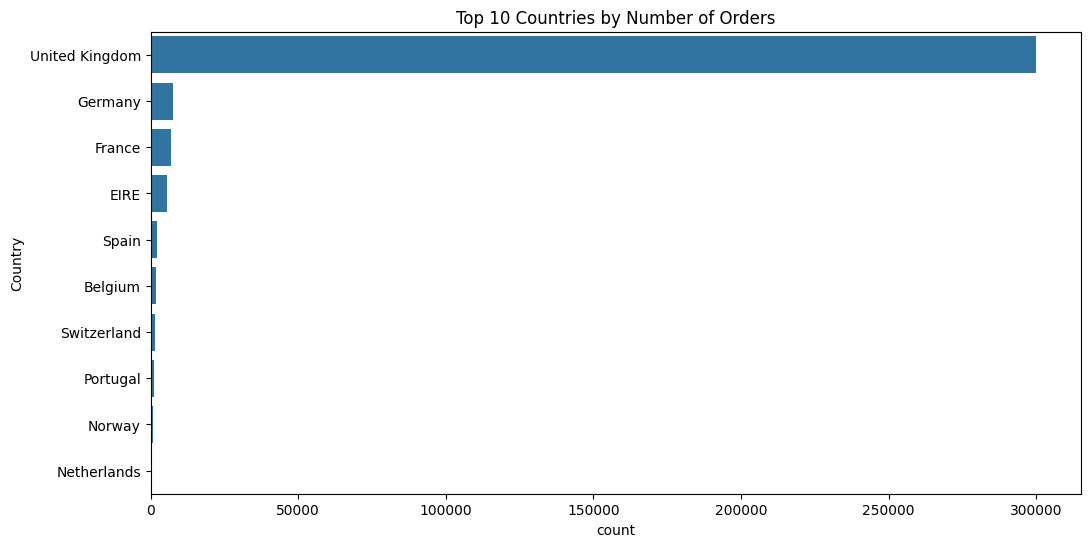

In [27]:
# 30. Plot number of orders per country
plt.figure(figsize=(12, 6))
top_10_countries = df['Country'].value_counts().nlargest(10).index
sns.countplot(y='Country', data=df, order=top_10_countries)
plt.title('Top 10 Countries by Number of Orders')
plt.show()